In [1]:
import cv2

In [2]:
import matplotlib.pyplot as plt

In [3]:
config_file = '/Users/risharane/Downloads/54a8e8b51beb3bd3f770b79e56927bd7-2a20064a9d33b893dd95d2567da126d0ecd03e85/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = '/Users/risharane/Downloads/frozen_inference_graph.pb'

In [4]:
model = cv2.dnn_DetectionModel(frozen_model, config_file)

In [5]:
classLabels = []
file_name = '/Users/risharane/Downloads/Labels.txt'
with open (file_name, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [6]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [7]:
print(len(classLabels))

80


In [8]:
model.setInputSize(320, 320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5, 127.5, 127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 0x7fa5507b9270>

In [9]:
img = cv2.imread('/Users/risharane/Downloads/dog.jpg')

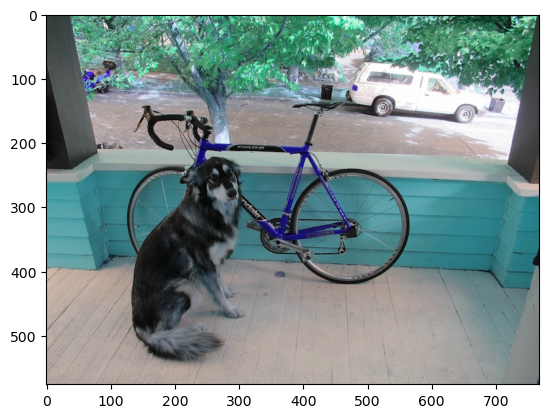

In [10]:
plt.imshow(img)

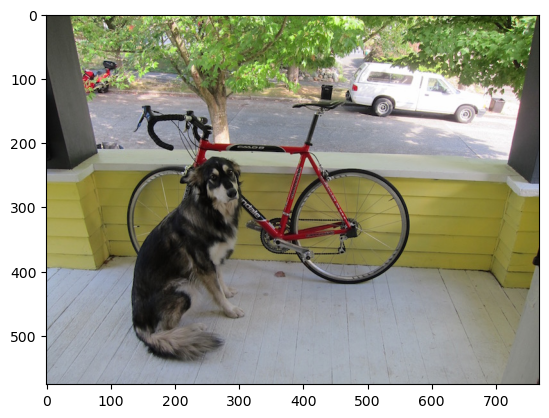

In [11]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [12]:
ClassIndex, confidence, bbox = model.detect(img, confThreshold = 0.5)

In [13]:
print(ClassIndex)

[ 2  3 18 17 15  8]


In [14]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, boxes,(255, 0, 0), 2)
    cv2.putText(img, classLabels[ClassInd - 1], (boxes[0] + 10, boxes[1] + 40), font, fontScale = font_scale, color = (0,255,0), thickness = 3)

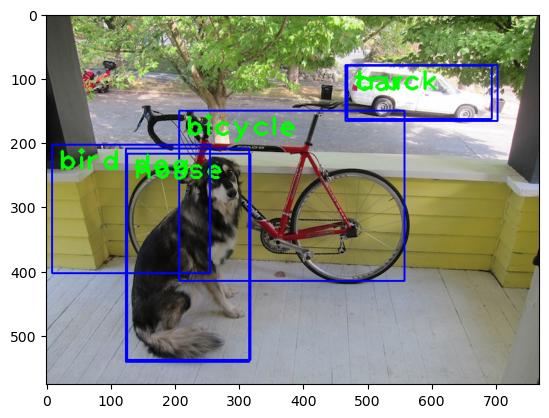

In [15]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [16]:
cap = cv2.VideoCapture('/Users/risharane/Downloads/21115-315137069_small.mp4')

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError('Cannot Open Video')
    
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold = 0.55)
    
    print(ClassIndex)
    if(len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if(ClassInd<=80):
                cv2.rectangle(frame, boxes,(255, 0, 0), 2)
                cv2.putText(frame, classLabels[ClassInd - 1], (boxes[0] + 10, boxes[1] + 40), font, fontScale = font_scale, color = (0,255,0), thickness = 3)
                
    cv2.imshow('Object Detection', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

[ 3  1  3  3  3  1 10  1  3  1  3  3]
[ 1  3  3  1  3 10  1  1  1  3]
[ 3  3  1  1  1 10  1  1  1  3  3]
[ 1  3  1  3  1 10  1  3  1  1]
[ 3  3  1  1  3  1  1  1 10  1  1 11  1  3]
[ 3  3  1 28  3  3 10  1  1  1]
[ 1  3  1  3  3  3 10  1  1]
[28  3  3  3  1 10  3  1]
[ 1  3  1  3  3  3 10  3  1 11]
[28  1  1  3  3  1  1 10]
[ 1  3  3 10  1  1  3  3 28]
[ 1  1  3  3 10  3  3]
[ 3  1  1  3  1 10  3  1]
[1 1 1 3 3 3 3 1 3 1 3 3]
[ 1  3  3  3  1 10  1  3]
[ 1  3  1  1  3  3 10]
[ 3  1  1 10  3  1  3  1  3  3]
[ 3  3  3  1  1  1 10  1]
[ 1  3  3  3 10]
[ 1  3  3  1  1  3 10  3  3  3]
[ 3  3  3  3  3  3  3 10 11  1  1]
[ 3  3  1  3 10  3]
[ 1 10  3  1  3  3  3  3  3]
[ 1  3 10  3  3  1  3  3  3]
[ 3  1 10  3  3 10  3 10]
[ 1  3  3  3  3  3  3 10]
[ 3  3  3  3 10  3 11  3]
[ 3  3 11  3  1  3 10  3  3  3  3]
[ 3  3 11  3  4 10  3  3  4  3]
[ 3 10  3  3  1 11  3]
[ 3  1  3  1  4 11  3 10  3  3 10]
[ 1  3  3  3 11  4 10  3  4]
[10  3  1  1  1  3  3]
[ 1  4  3  3  3 10 11  3  3]
[ 3  3  3 11  3  

error: OpenCV(4.7.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'
